<a href="https://colab.research.google.com/github/witkov/scripts/blob/master/energy_harvesting_prosthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

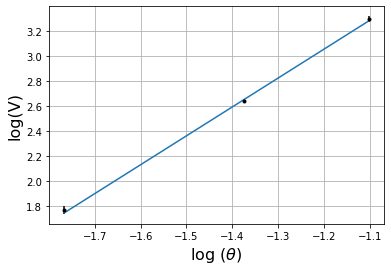

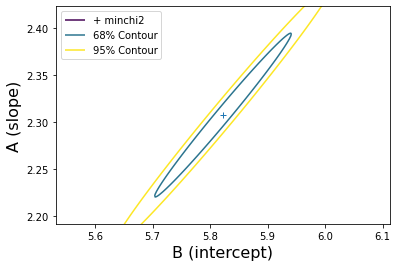

CHI-SQUARED ANALYSIS RESULTS
A_best = 2.31
B_best = 5.82
minchi2 = 1.50
n = 2.31
N = 3
minchi2 good fit range = [ 0.55 , 5.45 ]


In [3]:
# 2dchi2.py version 5/12/20
# This script does chi-square curve fitting to a 2-parameter linear model
# y = Ax + B
# Three arrays are needed:
    # x is an array of mean values for the independent variable
    # y is an array of mean values for the depednent variable
    # y_err is an array of standard errors (i.e., SD/(sqrt of N)) for y
# This script assumes errors on the dependent (y) variable only.
# SOFTWARE DEPENDENCIES:  Python 3, Numpy, Matplotlib
# ---------------------------------------------------------------------------
# AUTHORS:  Carey Witkov, witkov@fas.harvard.edu, and Keith Zengel, zengel@fas.harvard.edu
# COPYRIGHT: This script is copyright (2017-2020) Carey Witkov and Keith Zengel.
# LICENSE:  Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
# https://creativecommons.org/licenses/by-nc/4.0/
# DISCLAIMER: THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt
from numpy import *
import numpy as np

# angle in radians
m = np.array([0.171, 0.253, 0.332]) 

# Output voltage (millivolts)
v1 = np.array([5.5, 6, 6.1])
v2 = np.array([13.8, 13.9, 14.4])
v3 = np.array([26.5, 28.1, 26.2])


v = np.array([mean(v1), mean(v2), mean(v3)])
n=len(v1)
N=len(v)
sigma_v=np.array([np.std(v1, ddof=1), np.std(v2, ddof=1), np.std(v3, ddof=1)]/np.sqrt(n));

# x,y data arrays and y-error array
x = log(m);
y = log(v); 
yerr = sigma_v/v;

# calculate sums needed to obtain chi-square
Syy=sum(y**2/yerr**2)
Sxx=sum(x**2/yerr**2)
S0=sum(1/yerr**2)
Sxy=sum((y*x)/yerr**2)
Sy=sum(y/yerr**2)
Sx=sum(x/yerr**2)

Abest = (S0*Sxy - Sx*Sy)/(S0*Sxx - (Sx*Sx))
Bbest = (Sy*Sxx - Sx*Sxy)/(S0*Sxx - (Sx*Sx))
minchi2 = Syy+(S0*(Sxy*Sxy) - 2*Sx*Sy*Sxy + Sxx*(Sy*Sy))/((Sx*Sx) - (S0*Sxx))
sigmaA = 1/sqrt(Sxx)
sigmaB = 1/sqrt(S0)

# create parameter grid
a = np.linspace(Abest-0.1*Abest,Abest+0.1*Abest,500)
b = np.linspace(Bbest-0.1*Bbest,Bbest+0.1*Bbest,500)
A,B = np.meshgrid(a,b)

# calculate chi-square over parameter grid
chi2=(Syy) + (A**2)*(Sxx) + (B**2)*(S0) - 2*A*Sxy - 2*B*Sy + 2*A*B*Sx
     
# plot data with errorbars 
plt.figure()
plt.errorbar(x,y,yerr,linestyle='None',fmt='.k')
plt.xlabel(r"log ($\theta$)",fontsize=16)
plt.ylabel('log(V)',fontsize=16)
plt.grid(True)
# plt.title('y vs x data and line-of-best-fit', fontsize=16)
plt.plot(x,Abest*x+Bbest)

# plot chi-square in A-b parameter plane with 68% and 95% contours
plt.figure()
levels=[minchi2,minchi2+2.3,minchi2+6]
Z=plt.contour(B,A,chi2,levels)
plt.ylim(Abest-0.05*Abest,Abest+0.05*Abest)
plt.xlim(Bbest-0.05*Bbest,Bbest+0.05*Bbest)
plt.plot(Bbest,Abest,'+')
plt.ylabel('A (slope)',fontsize=16)
plt.xlabel('B (intercept)',fontsize=16)

# add legend
artists, labels = Z.legend_elements()
plt.legend(handles=artists, labels=["+ minchi2","68% Contour","95% Contour"], loc='upper left')
plt.show()

# display main results
print("CHI-SQUARED ANALYSIS RESULTS")
Abest_float = "{:.2f}".format(Abest)
print("A_best =",Abest_float)
Bbest_float = "{:.2f}".format(Bbest)
print("B_best =",Bbest_float)
minchi2_float = "{:.2f}".format(minchi2)
print("minchi2 =",minchi2_float)
n="{:.2f}".format(Abest)
print("n =", n)
print("N =", N)
N_min_float = "{:.2f}".format(N-sqrt(2*N))
N_max_float = "{:.2f}".format(N+sqrt(2*N))
print("minchi2 good fit range = [",N_min_float, ",",N_max_float,"]")
# contour68 = "{:.2f}".format(levels[1])
# print("chi2 for 68% Contour =", contour68)
# contour95 = "{:.2f}".format(levels[2])
# print("chi2 for 95% Contour =", contour95)
